# Linguistics
####  Web Scraping Reddit

Though Reddit has its own API, there is a more popular API for working with Reddit called **Pushshift**. You can read more about Pushshift in this [arXiv article](https://arxiv.org/abs/2001.08435). (PDF)

> Why do people use Pushshift’s API instead of the official Reddit API?
>
>In short, Pushshift makes it much easier for researchers to query and retrieve historical Reddit data, provides extended functionality by providing fulltext search against comments and submissions, and has larger single query limits.
>
>Jason Baumgartner, et al., "The Pushshift Reddit Dataset"

#### Install PSAW

To work with the Pushshift API, we're going to install and use a Python wrapper called [PSAW](https://github.com/dmarx/psaw).

In [1]:
!pip3 install psaw

Import packages: [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [matplotlib](https://matplotlib.org/3.1.1/contents.html).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Import PushshiftAPI to use the API

In [6]:
from psaw import PushshiftAPI

Initialize PushShiftAPI

In [7]:
api = PushshiftAPI()

#### PSAW Usage


To collect Reddit posts:

`api.search_submissions(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date)`

To collect Reddit comments:

`api.search_comments(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date)`

#### Collect Reddit submissions for a subreddit (with more than a certain upvote score)

Set up generator to make API request

In [22]:
api_request_generator = api.search_submissions(subreddit='Cornell')

Grab data for each Reddit submission and make it into a dataframe.

In [23]:
cornell_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

Check how many Reddit posts have been collected.

In [24]:
cornell_submissions.shape

(51792, 111)

Check what columns/metadata are in the dataframe.

In [25]:
cornell_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair',
       ...
       'subreddit_name_prefixed', 'rte_mode', 'author_id', 'brand_safe',
       'previous_visits', 'approved_at_utc', 'banned_at_utc', 'view_count',
       'mod_reports', 'user_reports'],
      dtype='object', length=111)

In [26]:
cornell_submissions[['title', 'score']].sample(10)

,title,score
37902,Okenshields Mishap,96
1073,"For some reason, I have not gone to Keepton on...",1
8179,Have the instructors released the decision of ...,1
33172,‘20,1
29978,Looking for a dad,1
40329,ATTENTION: The post below me titled “Cornell E...,61
13786,CornellFunk No.8: Muddy Uphill Path to ...?,1
46755,intro to controlled fusion,2
51228,Incoming transfer here. Anyone care to answer ...,6
765,ORIE 3510 Stochastic Processes,1


Only select columns of interest and assign to a new dataframe.

In [27]:
cornell_final = cornell_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

cornell_final

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,RebeccaRR9,A prerequisite for ASTRO2211 is intro to calc…...,,https://i.redd.it/r03zngt05oy71.jpg,Cornell,1,0,0.0
1,cornelldesigner,"Actually No, Martha, You SUCK at Communicating.",Let me first preface this by saying that even ...,https://www.reddit.com/r/Cornell/comments/qqic...,Cornell,1,0,0.0
2,afogadurapps,Gamer only!!!,[removed],https://www.reddit.com/r/Cornell/comments/qqi8...,Cornell,1,0,0.0
3,why-am-i-at-cornell,anyone notice martha spelled Akwe:kon wrong,another great look,https://www.reddit.com/r/Cornell/comments/qqi5...,Cornell,1,0,0.0
4,BoBigBed,Where were u wen Campus close?,I was in dorm eating dorito when phone ring\n\...,https://www.reddit.com/r/Cornell/comments/qqi0...,Cornell,1,0,0.0
...,...,...,...,...,...,...,...,...
51787,ali0,And just like that the number of subscribers r...,,https://www.reddit.com/r/Cornell/comments/9vrd...,Cornell,2,0,0.0
51788,[deleted],anything new and cool going on in Ithaca?,[deleted],https://www.reddit.com/r/Cornell/comments/8vzk...,Cornell,1,0,0.0
51789,ImMakingToast,"CIT loses 45000 student, staff, and alumni nam...",,http://faq-june2009.cuinfo.cornell.edu/,Cornell,3,2,0.0
51790,[deleted],anything new and cool going on in Ithaca?,[deleted],https://www.reddit.com/r/Cornell/comments/8ugt...,Cornell,1,0,0.0


Now, we can export our finalized cleaned dataframe into a csv file.

In [34]:
cornell_final.to_csv("cornell_final.csv", encoding='utf-8', index=False)

## Collect Reddit submissions based on search keyword (with more than a certain upvote score)

Set up generator to make API request

In [29]:
api_request_generator = api.search_submissions(q='Cornell', score = ">2000")

Grab data for each Reddit submission and make into a DataFrame

In [30]:
cornell_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])
cornell_submissions.shape

/Users/gabychu/opt/anaconda3/lib/python3.8/site-packages/psaw/PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


(93, 87)

In [31]:
cornell_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,ccwarrenator,"My Grandpa fought in WW2, was a chemistry prof...",,https://i.redd.it/7ynkr3hyeze61.jpg,OldSchoolCool,11639,270,1.0
1,the_light_of_dawn,Reggie's Lecture At Cornell: Reggie Calls Wii ...,,https://www.resetera.com/threads/reggies-lectu...,NintendoSwitch,3410,363,0.0
2,evaee00,Can you please not apply to Cornell? My son wa...,So this is a story that happened to my friend ...,https://www.reddit.com/r/entitledparents/comme...,entitledparents,11375,241,0.0
3,BoomWhatWhat,Cornell will eliminate medical school debt for...,,https://www.cnn.com/2019/09/17/us/cornell-scho...,news,44406,2220,0.0
4,SirCSquared,I took this photo at the last Soundgarden conc...,,https://i.redd.it/op394mbhgkd31.jpg,lastimages,4759,185,0.0
...,...,...,...,...,...,...,...,...
88,SXS_Blackholes,Science AMA Series: We are graduate students a...,"We work in the field of numerical relativity, ...",http://www.reddit.com/r/science/comments/2l259...,science,3272,883,NaN
89,mubukugrappa,"The larger your friends, the larger your appet...",,http://foodpsychology.cornell.edu/op/the_fat_s...,science,3456,560,NaN
90,wpiman,My buddy is a third generation Cornell grad. H...,,http://www.livememe.com/d2k1qn5,AdviceAnimals,3085,883,NaN
91,A_Ninjas_Fart,Scientists at Cornell develop technique that k...,,http://www.voanews.com/content/scientists-deve...,science,2821,319,NaN


Where are the popular "Cornell" Reddit posts appearing?

In [32]:
cornell_submissions['subreddit'].value_counts()

science                 17
IAmA                     7
The_Donald               7
todayilearned            6
Music                    4
news                     3
OldSchoolCool            3
videos                   3
SandersForPresident      3
askscience               3
politics                 2
Showerthoughts           2
lastimages               2
InternetIsBeautiful      2
movies                   2
uncensorednews           1
NintendoSwitch           1
KotakuInAction           1
AdviceAnimals            1
interestingasfuck        1
bidenbro                 1
Metal                    1
AmItheAsshole            1
entitledparents          1
pics                     1
tattoos                  1
relationships            1
CFB                      1
AskHistorians            1
lego                     1
Damnthatsinteresting     1
unpopularopinion         1
coolguides               1
RetroFuturism            1
LadyBoners               1
SeattleWA                1
offmychest               1
D

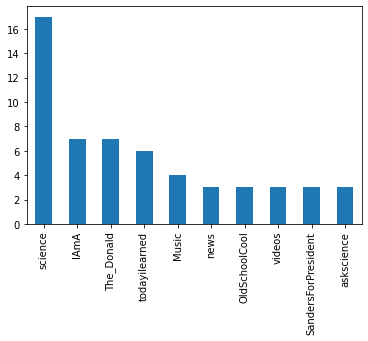

In [33]:
cornell_submissions['subreddit'].value_counts()[:10].plot(kind='bar')
plt.show()

# Resources
- [Reddit Pushshift](https://github.com/pushshift/api)
    - [Reddit Pushshift arXiv paper PDF](https://arxiv.org/pdf/2001.08435.pdf)
- [Reddit Pushshift Python Wrapper — PSAW](https://github.com/dmarx/psaw)
- [Twwitter API Python Wrapper — Twarc](https://github.com/DocNow/twarc)
- [Twitter API documentation](https://developer.twitter.com/en/docs/twitter-api/getting-started/guide)
# Recommended Reading: Social Media Data Ethics
- [Doc Now White Paper](https://www.docnow.io/docs/docnow-whitepaper-2018.pdf), Bergis Jules, Ed Summers, Dr. Vernon Mitchell, Jr.
- [No Robots, Spiders, or Scrapers: Legal and Ethical Regulation of Data Collection Methods in Social Media Terms of Service](https://cmci.colorado.edu/~cafi5706/ICWSM2020_datascraping.pdf), Casey Fiesler, Nathan Beard, Brian C. Keegan
- [#transform(ing)DH Writing and Research: An Autoethnography of Digital Humanities and Feminist Ethics](http://www.digitalhumanities.org/dhq/vol/9/2/000209/000209.html), Moya Bailey
- [The #TwitterEthics Manifesto](https://modelviewculture.com/pieces/the-twitterethics-manifesto), Dorothy Kim and Eunsong Kim